In [3]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [4]:
df_train = pd.read_csv('Genre Classification Dataset/train_data.txt',sep=' ::: ',header=None,engine='python', names=['Title','Genre','Description'])
df_train

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...


In [5]:
df_test = pd.read_csv('Genre Classification Dataset/test_data.txt',sep=' ::: ',header=None,engine='python', names=['Title','Genre','Description'])
df_test

,Title,Genre,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),Before he was known internationally as a marti...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Dar..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their ...
54197,54198,Oliver Twink (2007),"A movie 169 years in the making. Oliver Twist,..."
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard ..."


In [6]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.shape

(108414, 3)

In [7]:

print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108414 entries, 0 to 108413
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Title        108414 non-null  object
 1   Genre        108414 non-null  object
 2   Description  108414 non-null  object
dtypes: object(3)
memory usage: 2.5+ MB
None
Title          0
Genre          0
Description    0
dtype: int64


# WordCloud

In [9]:
# Use the correct column name 'Description'
text = " ".join(df_train["Description"].dropna().astype(str))

In [10]:
df.columns

Index(['Title', 'Genre', 'Description'], dtype='object')

In [11]:
import re

text = text.lower()
text = re.sub(r"[^a-z\s]", "", text)


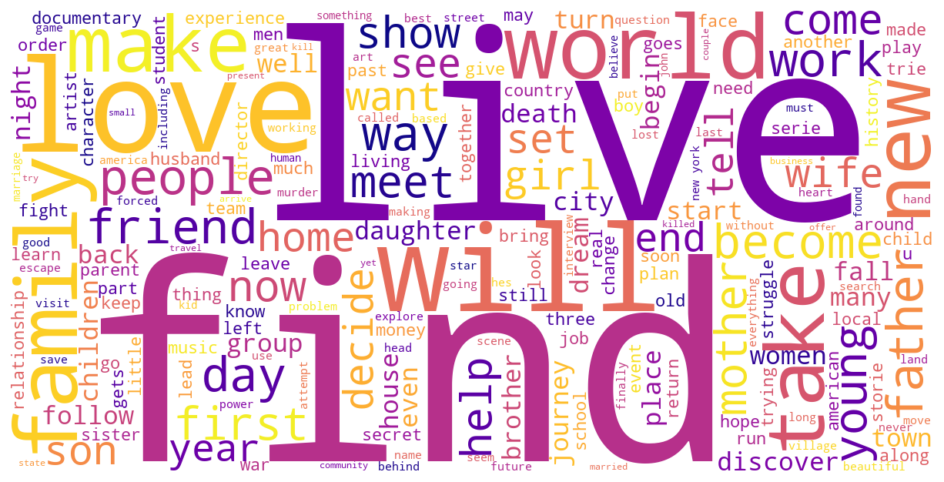

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update([
    "film", "movie", "story", "one", "two",
    "man", "woman", "life", "time"
])

wc = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    stopwords=stopwords,
    colormap="plasma"
).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


# Explanatory Data Analysis

<Axes: title={'center': 'Genre Count in the Dataset'}, xlabel='Genre', ylabel='Count'>

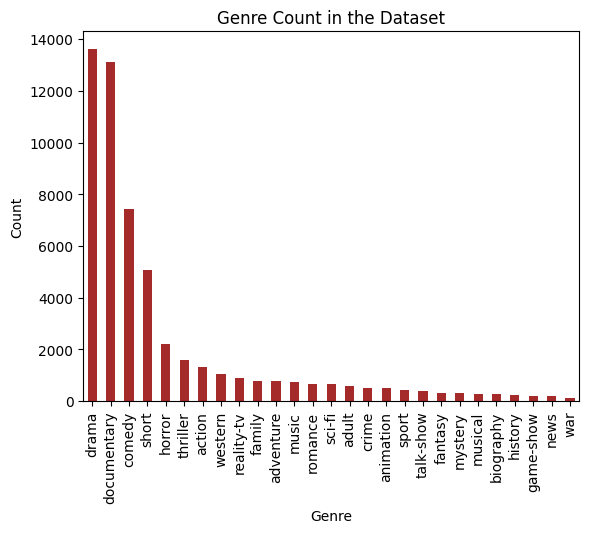

In [ ]:
genre_cnt = df_train["Genre"].value_counts()
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Count in the Dataset")
genre_cnt.plot(kind='bar',color='brown')

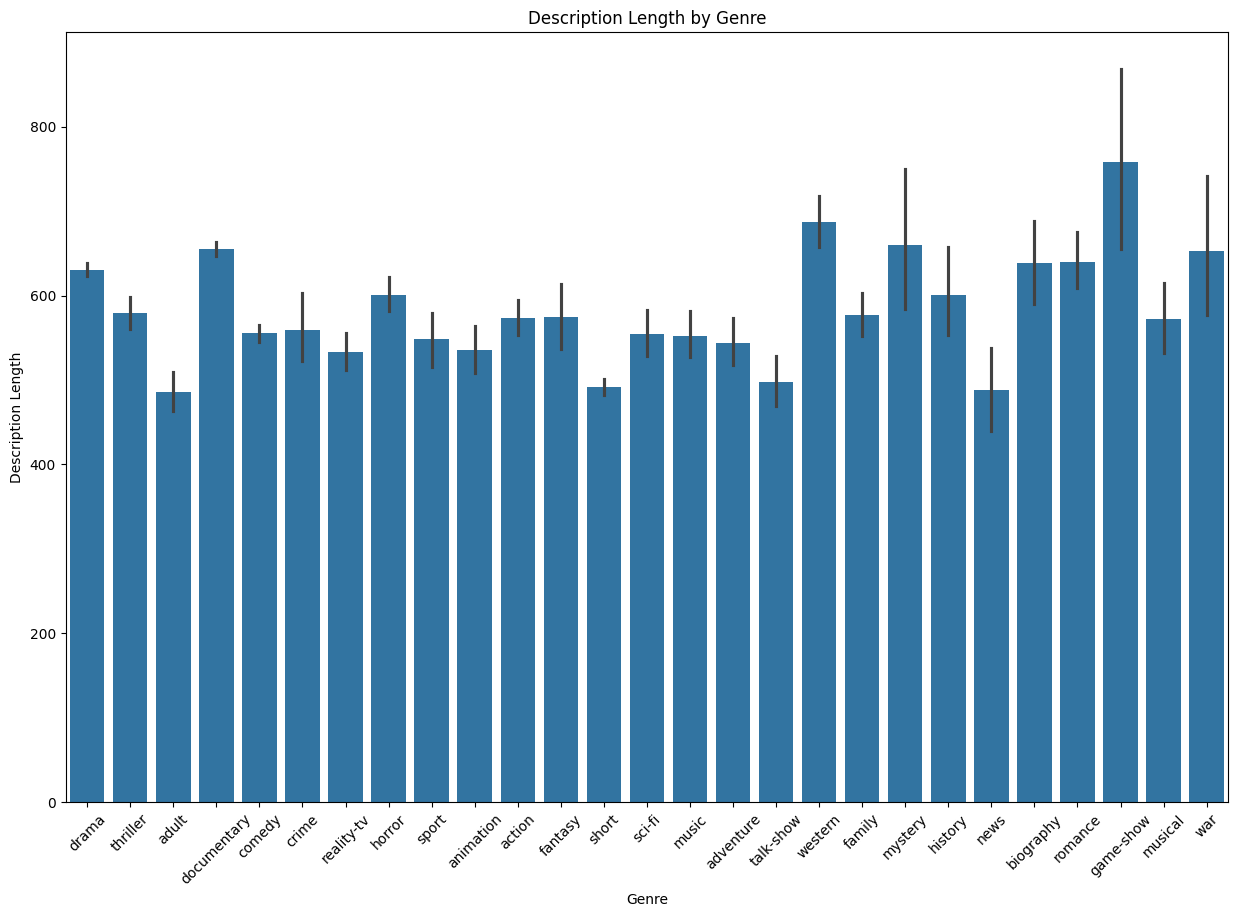

In [ ]:
df_train['DESCRIPTION_length'] = df_train['Description'].apply(len)
plt.figure(figsize=(15, 10))
sns.barplot(x='Genre', y='DESCRIPTION_length', data=df_train)
plt.title('Description Length by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()

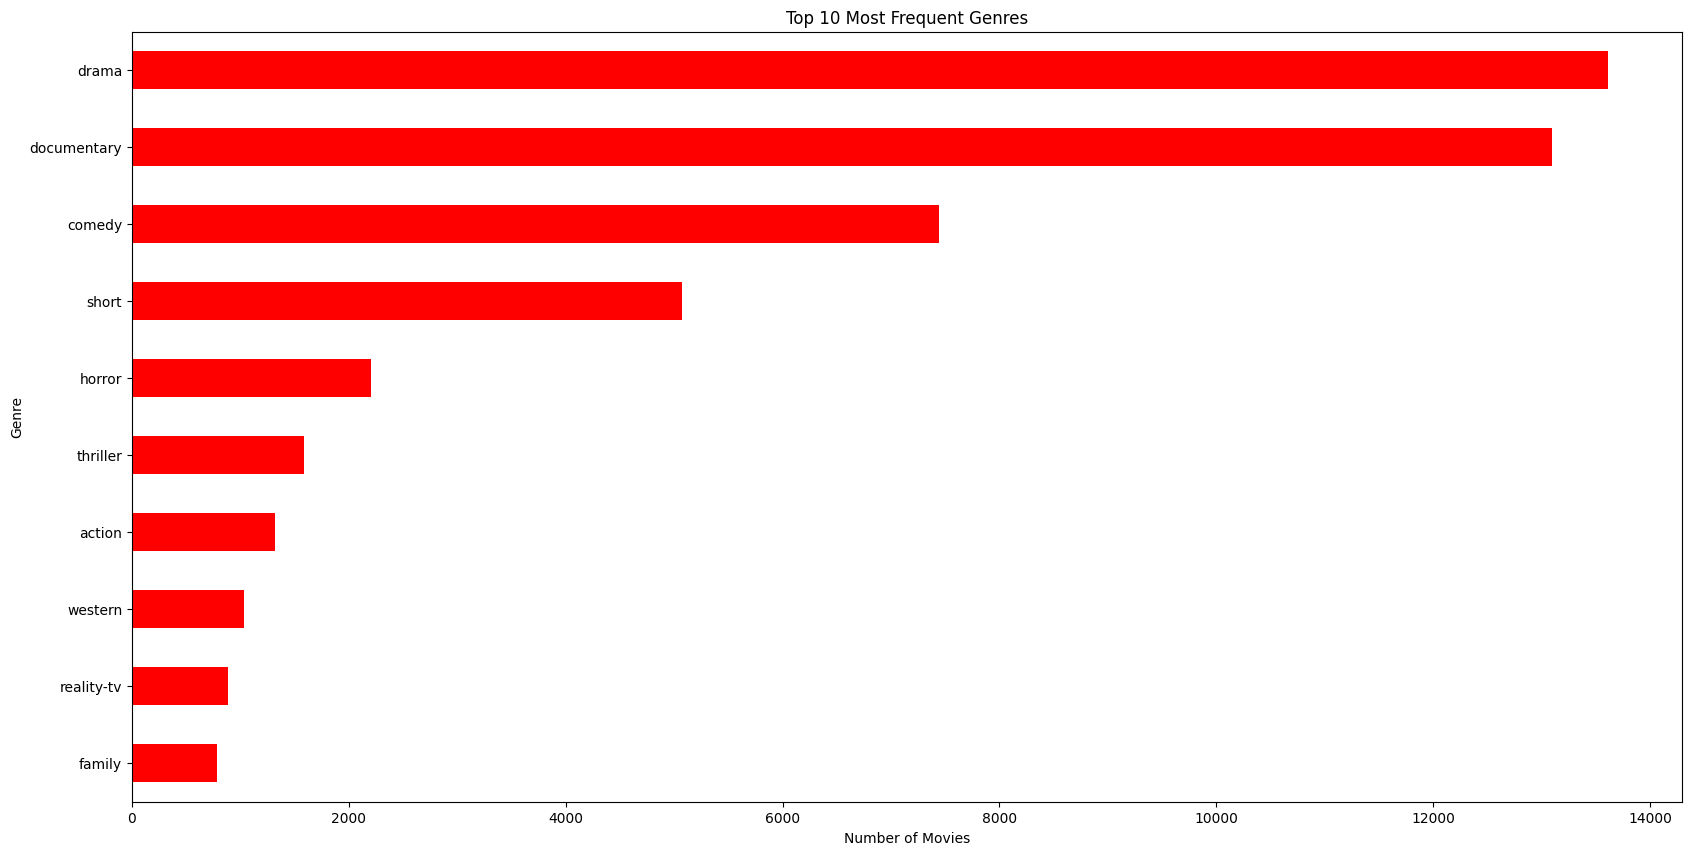

In [ ]:
top_genres = df_train['Genre'].value_counts().head(10)

plt.figure(figsize=(20, 10))
top_genres.plot(kind='barh', color='red')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
X = df["Description"] 
y = df["Genre"]         

In [ ]:
X = X.str.lower()


# TRAIN TEST SPLIT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
genre_counts = y.value_counts()
valid_genres = genre_counts[genre_counts >= 2].index

df = df[df["Genre"].isin(valid_genres)]

X = df["Description"]
y = df["Genre"]


In [ ]:
y.value_counts().min()


np.int64(132)

In [ ]:
X = X.str.lower()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# FEATURE ENGINEERING

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words="english",
    min_df=5
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)


# MODEL TRAINING

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier


In [ ]:
models = {
    "Naive Bayes": MultinomialNB(),

    "Logistic Regression": LogisticRegression(
        solver="liblinear",
        max_iter=1000,
        class_weight="balanced"
    ),

    "Linear SVM": LinearSVC(class_weight="balanced"),

    "SGD Classifier": SGDClassifier(
        loss="log_loss",
        max_iter=1000,
        random_state=42,
        class_weight="balanced"
    )
}


In [ ]:
from sklearn.metrics import f1_score

results = []

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    results.append({
        "Model": name,
        "F1_score": f1_score(y_test, y_pred, average="weighted")
    })


c:\Users\arnav\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


In [ ]:
import pandas as pd

results_df = pd.DataFrame(results).sort_values(
    by="F1_score",
    ascending=False
)

results_df


,Model,F1_score
1,Logistic Regression,0.529455
2,Linear SVM,0.499496
3,SGD Classifier,0.493285
0,Naive Bayes,0.442530


# PREDICTION

In [ ]:
def predict_movie_genre(description):
    description = description.lower()
    description_tfidf = tfidf.transform([description])
    prediction = model.predict(description_tfidf)
    return prediction[0]


In [ ]:
sample_descr_for_movie = "A movie where police catches the criminal and shoots him"
print(predict_movie_genre(sample_descr_for_movie))


crime


In [ ]:
sample_descr_for_movie1 = "A movie where a man tries to force a girl to marry him but she refuses"
print(predict_movie_genre(sample_descr_for_movie1))


romance
